## Trabajo Práctico 4 - Estimación de parámetros

---

Simular una muestra de dos variables aleatorias $X_1$ y $X_2$ que siguen una distribución normal estándar. Calcular la varianza muestral $s^2$. Considerar dos estimadores diferentes de la desviación estándar $t_1 = \sqrt{s^2}$ y $t_2 = \sqrt{\pi s^2/2}$. Repetir la simulación 1000 veces y construir los histogramas de frecuencia de $t_1$ y $t_2$. Decidir si los estimadores $t_1$ y $t_2$ son sesgados o no. Discutir porque el estimador de varianza $s^2$ no tiene sesgo pero el estimador de la desviación estándar $t_1 = \sqrt(s^2)$ es sesgado.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
seed = 123456789

In [2]:

# Simulamos la muestra de dos variables aleatorias. (Luego haremos las 1000 simulaciones, primero testeamos alguna definiciones)
N_sample = 2
N_iter = 1
X = np.random.default_rng(seed).normal(size=(N_sample, N_iter))
var_muestral = np.var(X, axis=0, ddof=1)
print(var_muestral)

# O usando la definicion analitica:
# Calculamos la media muestral
mean_X = np.mean(X)

# Calculamos la varianza muestral s^2 usando la expresion analítica
s2_X_analitica = np.sum((X - mean_X)**2) / (N_sample - 1)
print(s2_X_analitica)
print('coinciden los valores obtenidos usando la función np.var de NumPy con el parámetro ddof=1, o la expresion analitica vista en la teoria')

[0.30657521]
0.30657520824856466
coinciden los valores obtenidos usando la función np.var de NumPy con el parámetro ddof=1, o la expresion analitica vista en la teoria


In [3]:
# Estimadores para X
t1_X = np.sqrt(var_muestral)
t2_X = np.sqrt((np.pi * var_muestral) / 2)

print(t1_X, t2_X)

[0.55369234] [0.69395044]


Ahora, para responder a las preguntas del enunciado,  generamos 1000 repeticiones de una muestra de 2 variables aleatorias normales estándar.

Luego, calculamos los estimadores t1 y t2.

Para determinar el sesgo, calculamos la media del estimador de la varianza muestral. Tanto para t_1 como para t_2. Y vemos graficamente, que tan alejado esta su valor de $\sigma^2=1$.

In [4]:
# Aqui generamos 1000 repeticiones de una muestra de 2 variables aleatorias normales estándar

N_sample = 2
N_iter = 1000
X = np.random.default_rng(seed).normal(size=(N_sample, N_iter))
var_muestral = np.var(X, axis=0, ddof=1)

# calculamos los estimadores t1 y t2 y sus medias
t1 = np.sqrt(var_muestral)
t2 = np.sqrt(np.pi * var_muestral / 2)
E_t1 = t1.mean()
E_t2 = t2.mean()


Hacemos los histogramas

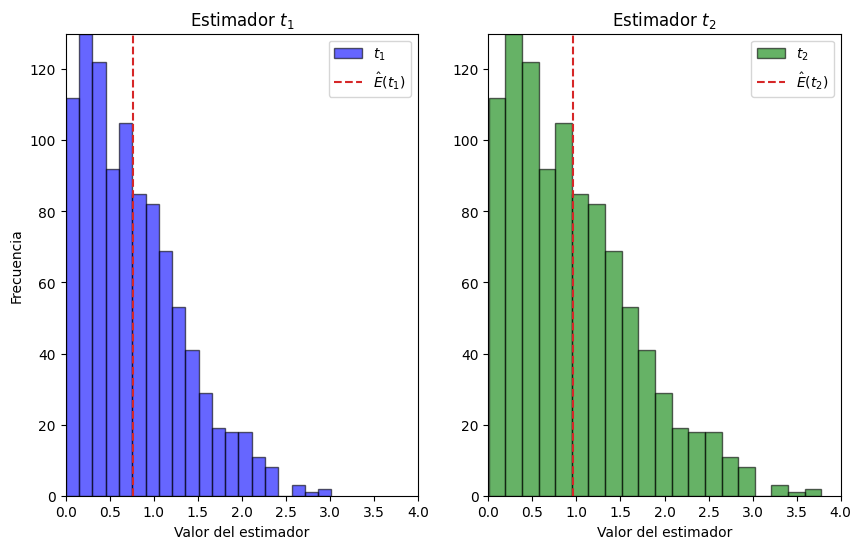

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
n1, bins1, patches1 = ax1.hist(t1, bins=20, alpha=0.6, color='blue', edgecolor='black', label=r'$t_{1}$')
ax1.plot([E_t1, E_t1], [0, 150], '--', color='tab:red', label=r'$\hat{E}(t_{1})$')
ax1.set_xlim(0, np.ceil(max(t1.max(),t2.max())))
ax1.set_xlabel('Valor del estimador')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Estimador $t_{1}$')
ax1.legend()
n2, bins2, patches2 = ax2.hist(t2, bins=20, alpha=0.6, color='green', edgecolor='black', label=r'$t_{2}$')
ax2.set_xlim(0, np.ceil(max(t1.max(),t2.max())))
ax2.set_xlabel('Valor del estimador')
ax2.set_title('Estimador $t_{2}$')
ax2.plot([E_t2, E_t2], [0, 150], '--', color='tab:red', label=r'$\hat{E}(t_{2})$')
ax2.legend()
ax1.set_ylim(0, np.ceil(max(n1.max(), n2.max())))
ax2.set_ylim(0, np.ceil(max(n1.max(), n2.max())))
plt.show()

En el gráfico se ve que el promedio de las simulaciones para el estimador $t_{2}$ tiende en probabilidad a la desviación estándar (que vale $\sigma=1$), mientras que para el estimador $t_{1}$ esto no se cumple (es decir, el estimador $t_{1}$ está sesgado).

 Para responder  por qué el estimador de la varianza s$^2$ no está sesgado mientras que el estimador de la desviación estándar $\sqrt{s^2}$ sí lo está,  analizamos el bias asociado a cada estimador. El mismo se define como la diferencia entre su valor esperado (esperanza) y el verdadero valor del parámetro que está estimando.

## Demostramos que el estimador de la varianza $s^2$ no esta sesgado:

En la demostracion, utilizaremos que:
- $E(\sum_i^n X_i)=\sum_i^n E(X_i)$
- $E(cX_i)=cE(X_i)$
- $Var(X) = E(X^2)-[E(X)]^2$
- $E(X^2)= Var(X) - [E(X)]^2 = \sigma^2+ \mu^2$
- $\bar{X}=\sum_{i=1}^n X_i/n$

Ademas,

- $E(\bar{X}^2)= Var(\bar{X}) - [E(\bar{X})]^2$

de donde sabemos que:
- $[E(\bar{X})] = \mu$
-  $Var(\bar{X})=Var(X_1, X_2....X_n)/n=\frac{1}{n^2}(\sigma^2 + \sigma^2 + ...) = \sigma^2/n$

Con esto ultimo podemos escribir:

$E(\bar{X}^2)= \frac{\sigma^2}{n} + \mu^2$


Para demostrar que $s^2$ no esta sesgado, debemos calcular el bias $B(s^2)=E(s^2)-\sigma^2$, y ver si es nulo.

o lo que es lo mismo, queremos demostrar que: $ E(s^2) = E(\frac{\sum_1^n(X_i-\bar{X})^2}{n-1})=\sigma^2$.

Estudiamos el numerador de la expresion anterior:

$E[\sum_1^n(X_i-\bar{X})^2]= E[\sum_1^n (X_i^2 -2X_i\bar{X} + \bar{X}^2)] = E[\sum_1^n X_i^2 -2\bar{X}n\bar{X} + n\bar{X}^2)] = E[\sum_1^n X_i^2 - n\bar{X}^2)]$

$=E[\sum_1^n X_i^2] - nE[\bar{X}^2]= \sum_1^n (\sigma^2 + \mu^2) - n (\sigma^2/n + \mu^2) = n\sigma^2 + n\mu^2 -\sigma^2 -n\mu^2 = (n-1)\sigma^2$


luego,  $E(s^2) = E(\frac{\sum_1^n(X_i-\bar{X})^2}{n-1})= (n-1)\sigma^2/(n-1) =\sigma^2 $

Y con ello: $B(s^2) =0$.



## Ahora estudiamos el sesgo de $\sqrt{s^2}$
La desviación estándar muestral se define como la raíz cuadrada de la varianza muestral, es decir $\sqrt{s^2}$.


El resultado que queremos probar es que $E(\sqrt{s^2})\ne\sqrt{E(s^2)}$.

Para ello, usaremos lo siguiente:

$s^2=\frac{1}{n-1}\sum_{i=1}^{n}\left(X_{i}-\bar{X}\right)^2
\land \sum_{i=1}^{n}\left(X_{i}-\bar{X}\right)^2\sim\sigma^{2}\chi_{n-1}^{2}$

\\

Como $\sum\left(X_{i}-\bar{X}\right)^{2}$ es una forma cuadrática, podemos utilizar el teorema de Cochran $⟶\frac{(n-1)s^2}{\sigma^2}\sim\chi_{n-1}^{2}$

\\


Donde $\chi_{n-1}^{2}$ es una distribución $\chi^{2}$ con $n-1$ grados de libertad, cuya función de densidad de probabilidad tiene la forma:

$f_{\chi_{n-1}^{2}}(x) = \frac{1}{2^{\left(\frac{n-1}{2}\right)}\Gamma\left(\frac{n-1}{2}\right)} x^{\left(\frac{n-1}{2}-1\right)}e^{-x/2}$



Ahora sí, calculamos la esperanza de $\sqrt{s^2} ⟶$ $E\left(\sqrt{s^2}\right)=E\left(\sqrt{\frac{\sigma^{2}}{n-1}\frac{(n-1)s^{2}}{\sigma^{2}}}\right) = \sqrt{\frac{\sigma^{2}}{n-1}} E\left(\sqrt{\frac{(n-1)s^{2}}{\sigma^{2}}}\right)$

\\



En el paso anterior nos quedó el valor esperado de la raíz cuadrada de $\frac{(n-1)s^{2}}{\sigma^{2}}$, que sabemos que sigue una distribución $\chi_{n-1}^{2}$. Si aplicamos la definición del operador esperanza:

$= \sqrt{\frac{\sigma^{2}}{n-1}}\int_{0}^{\infty}\sqrt{x}f(x)dx$

Donde la función $f(x)$ es una $\chi_{n-1}^{2}$

Multiplicamos y dividimos por $\Gamma\left(n/2\right)$ para obtener lo siguiente:

\\

$E\left(\sqrt{s^{2}}\right)=\sqrt{\frac{\sigma^{2}}{n-1}}\frac{\Gamma(n/2)}{\Gamma\left(\frac{n-1}{2}\right)}\int_{0}^{\infty}\frac{\left(1/2\right)^{\frac{n-1}{2}}}{\Gamma(n/2)}x^{1/2}x^{\left(\frac{n-1}{2}-1\right)}e^{-x/2}dx$

\\

$E\left(\sqrt{s^{2}}\right)=\sqrt{\frac{\sigma^{2}}{n-1}}\frac{\Gamma(n/2)}{\Gamma\left(\frac{n-1}{2}\right)}\int_{0}^{\infty}\frac{\left(1/2\right)^{\frac{n-1}{2}}}{\Gamma(n/2)}x^{\left(\frac{n}{2}-1\right)}e^{-x/2}dx$

\\

$E\left(\sqrt{s^{2}}\right)=\sqrt{\frac{\sigma^{2}}{n-1}}\frac{\Gamma(n/2)}{\Gamma\left(\frac{n-1}{2}\right)}\sqrt{2}\int_{0}^{\infty}\frac{\left(1/2\right)^{\frac{n}{2}}}{\Gamma(n/2)}x^{\left(\frac{n}{2}-1\right)}e^{-x/2}dx$

Se puede ver que la función dentro de la última integral es la función de densidad de probabilidad de una distribución $\chi_{n}^{2}$, y la integral recorre todo su dominio, por lo que el resultado es $1$. Entonces:

$E\left(\sqrt{s^{2}}\right)=\sigma \sqrt{\frac{2}{n-1}}\frac{\Gamma(n/2)}{\Gamma\left(\frac{n-1}{2}\right)}$

Por lo tanto, el sesgo es:

$B(\sqrt{s^2})=E(\sqrt{s^2})-\sigma = \sigma \sqrt{\frac{2}{n-1}}\frac{\Gamma(n/2)}{\Gamma\left(\frac{n-1}{2}\right)} - \sigma = \sigma\left(\sqrt{\frac{2}{n-1}}\frac{\Gamma(n/2)}{\Gamma\left(\frac{n-1}{2}\right)}-1\right)$

En nuestro problema, tenemos una muestra de dos variables aleatorias, por lo que $n=2$:

$B(\sqrt{s^2}) = \sigma\left(\sqrt{\frac{2}{2-1}}\frac{\Gamma(2/2)}{\Gamma\left(\frac{2-1}{2}\right)}-1\right) = \sigma \left(\sqrt{\frac{2}{\pi}}-1\right) \approx -0,202 \sigma$

En el resultado se puede ver que tiene sesgo negativo, tal como se infirió de los resultados de las simulaciones